# 1. Uso básico de GPyOpt

In [1]:
import GPy
import GPyOpt
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

Para usar GPyOpt necesitamos tres elementos:

1) La función $f$ que queremos minimizar 

In [2]:
def f(x):
    return x**2

2) Los límites de evaluación de la función:

In [3]:
bounds=[{'name': 'x', 'type': 'continuous', 'domain': (-5,6)}]

3) El máximo numero de evaluaciones de la función:

In [4]:
max_iter=20

Creamos un objeto "myProblem" con las condiciones del problema:

In [5]:
myProblem = GPyOpt.methods.BayesianOptimization(f,bounds)

Y corremos la optimización sobre el objeto:

In [6]:
myProblem.run_optimization(max_iter)

El valor de x que minimiza la función está dad por:

In [7]:
myProblem.x_opt

array([0.08974033])

Mientras que el valor que toma la función en el mínimo encontrado es:

In [8]:
myProblem.fx_opt

0.008053326733771776

# 1. Implementación en una dimensión

In [37]:
# Define the function 
def fpol(x):
#     f = np.poly1d([1, -2, -28, 28, 12, -26, 100])
    SineLowFreq = np.sin(x * 0.01 * np.pi)
    SineMedFreq = 0.25 * np.sin(x * 0.01 * np.pi * 4.9);
    SineHighFreq = 0.15 * np.sin(x * 0.01 * np.pi * 12.1);
    #f = SineLowFreq + SineMedFreq + SineHighFreq;
    f = SineLowFreq + SineMedFreq;
#     f = SineLowFreq
    # Return the value of the polynomial
    return f 

Minimum of -1.2460 occurs at 152.6153


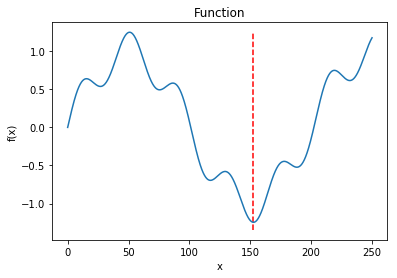

In [38]:
# Plot the function

# Space over which to evluate the function is -5 to 6
xmin=0
xmax=250
x = np.linspace(xmin,xmax, 10000)
y = fpol(x)

miny = min(y)
minx = x[np.argmin(y)]

# Visualize the function
#plt.figure(figsize = (8, 6))
#plt.style.use('fivethirtyeight')
plt.title('Function'); 
plt.xlabel('x'); 
plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 0.1, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

In [58]:
# Define the function's bounds
bounds1D = [{'name': 'x', 'type': 'continuous', 'domain': (xmin,xmax)}]  # problem constraints 

# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt = GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement

Acquisition Functions: 
- Maximum probability of improvement (MPI), 
- Expected improvement (EI), and 
- Upper confidence bound (GP-UCB).

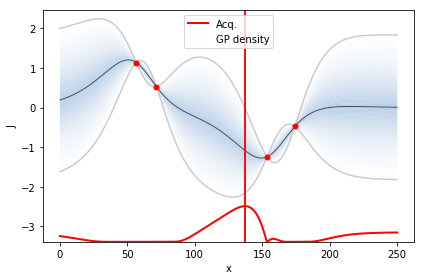

In [59]:
# Run the optimization
max_iter = 1     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()

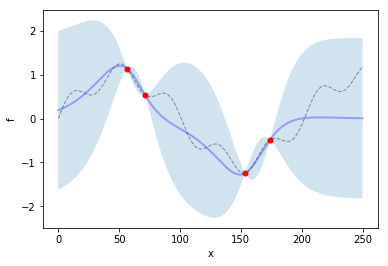

In [60]:
x_grid=np.loadtxt("xgrid")
m=np.loadtxt("mean")
m_plus=np.loadtxt("mean_plus")
m_less=np.loadtxt("mean_less")
Xdata=np.loadtxt("Xdata")
Ydata=np.loadtxt("Ydata")
ax = plt.subplot(111)
plt.plot(x, y,'k--',lw=1,alpha = 0.4)
plt.plot(x_grid,m, 'b-',lw=2, alpha=0.3)
ax.fill_between(x_grid, m_plus, m_less, alpha=0.2)
plt.plot(Xdata, Ydata, 'r.', markersize=10)
plt.xlabel('x')
plt.ylabel('f')
plt.show()

In [68]:
# Define the function's bounds
bounds1D = [{'name': 'x', 'type': 'continuous', 'domain': (xmin,xmax)}]  # problem constraints 

# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt = GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement

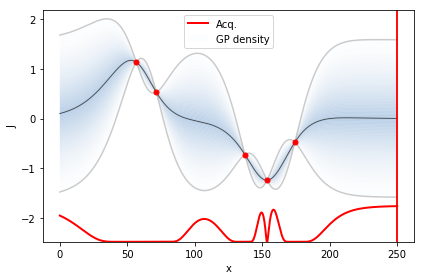

In [69]:
# Run the optimization
max_iter = 2     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()

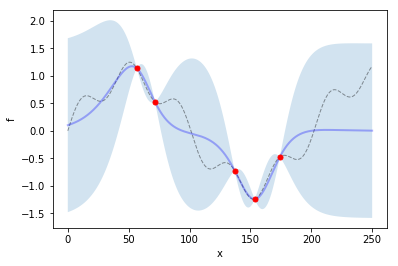

In [70]:
x_grid=np.loadtxt("xgrid")
m=np.loadtxt("mean")
m_plus=np.loadtxt("mean_plus")
m_less=np.loadtxt("mean_less")
Xdata=np.loadtxt("Xdata")
Ydata=np.loadtxt("Ydata")
ax = plt.subplot(111)
plt.plot(x, y,'k--',lw=1,alpha = 0.4)
plt.plot(x_grid,m, 'b-',lw=2, alpha=0.3)
ax.fill_between(x_grid, m_plus, m_less, alpha=0.2)
plt.plot(Xdata, Ydata, 'r.', markersize=10)
plt.xlabel('x')
plt.ylabel('f')
plt.show()

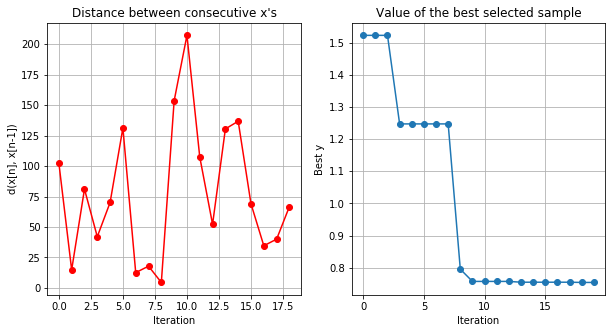

In [54]:
myBopt.plot_convergence()

# 3. Bidimensional implementation

In [8]:
# Define the object function
def fsixhumpcammel(x):
    x1 = x[:, 0]
    x2 = x[:, 1]
    return (4-2.1*x1**2+x1**4/3)*x1**2 + x1*x2 + (-4+4*x2**2)*x2**2

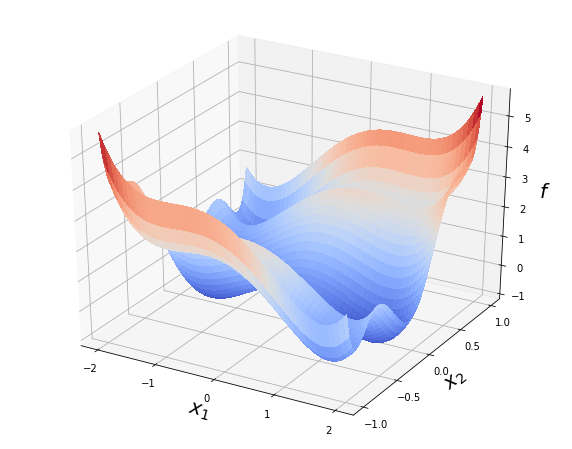

In [9]:
# Plot 3D function
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.ticker as ticker

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

# Plot the function
# Space over which to evaluate the function is -2 to 2
npts=100
x1 = np.linspace(-2, 2, npts)
x2 = np.linspace(-1, 1, npts)
X1, X2 = np.meshgrid(x1,x2, sparse=True)
XX = np.ndarray(shape=(1,2))
Z = np.ndarray(shape=(npts,npts))

for i in range(npts):
    XX[0,0]=x1[i]
    for j in range(npts):
        XX[0,1]=x2[j]
        Z[i,j] = fsixhumpcammel(XX)

# Plot the surface.
surf = ax.plot_surface(X1,X2,Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$f$', fontsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

In [10]:
# Define the bounds of the function
bounds2D =[{'name': 'x1', 'type': 'continuous', 'domain': (-2,2)},
         {'name': 'x2', 'type': 'continuous', 'domain': (-1,1)}]

In [11]:
# Creates three identical objects that we will later use to compare the optimization strategies 
myBopt2D = GPyOpt.methods.BayesianOptimization(f=fsixhumpcammel,
                                               domain=bounds2D,
                                               model_type = 'GP',
                                               acquisition_type='EI',  
                                               normalize_Y = True,
                                               acquisition_weight = 20)

In [12]:
# runs the optimization for the three methods
max_iter = 60  # maximum time 40 iterations
max_time = 180  # maximum time 60 seconds

myBopt2D.run_optimization(max_iter,max_time,verbosity=False)            

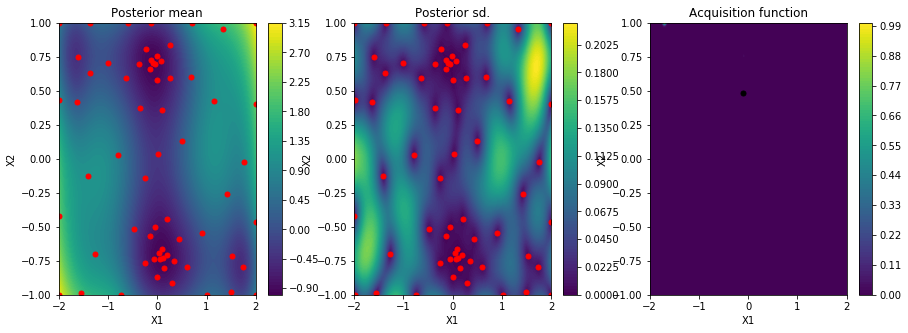

In [13]:
myBopt2D.plot_acquisition()

In [17]:
print('x1= [ 0.0898 -0.7126] f(x1)= -1.0316')
print('x2= [-0.0898  0.7126] f(x2)= -1.0316')
np.set_printoptions(precision=4)
print("x*= {} f(x*)= {:7.4f} ".format(myBopt2D.x_opt,myBopt2D.fx_opt))

x1= [ 0.0898 -0.7126] f(x1)= -1.0316
x2= [-0.0898  0.7126] f(x2)= -1.0316
x*= [-0.088   0.7071] f(x*)= -1.0314 


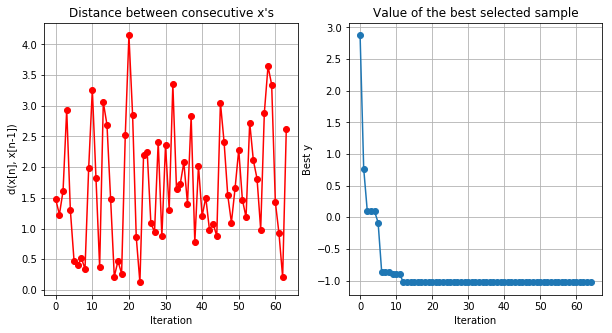

In [169]:
myBopt2D.plot_convergence()